In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. 데이터 생성
- 남자, 여자의 키와 몸무게 데이터를 군집화

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
random.randint(40,95) # 40부터 95까지의 정수 중 하나를 무작위 선택 반환

69

In [5]:
data = []
for i in range(50):
    # 여자 데이터
    data.append([random.randint(40,70), random.randint(140,170)])
    # 남자 데이터
    data.append([random.randint(60,95), random.randint(160,195)])
#data

In [6]:
# 여자
for female in data[:100:2]:
    print(female, end=' ')
# 남자
print('\n-------------------------------')
for male in data[1:100:2]:
    print(male, end=' ')

[51, 168] [62, 157] [53, 162] [59, 164] [52, 150] [52, 170] [59, 165] [41, 145] [66, 145] [47, 156] [70, 154] [65, 159] [49, 167] [60, 143] [43, 156] [65, 148] [55, 160] [43, 141] [53, 147] [58, 169] [45, 149] [57, 157] [70, 145] [44, 146] [66, 166] [42, 166] [68, 159] [47, 149] [69, 146] [52, 163] [43, 158] [64, 150] [44, 158] [59, 151] [58, 161] [43, 157] [66, 165] [48, 142] [60, 154] [63, 164] [63, 170] [69, 165] [62, 159] [52, 148] [56, 140] [42, 141] [44, 146] [68, 151] [58, 142] [40, 160] 
-------------------------------
[84, 175] [77, 170] [61, 188] [72, 176] [72, 177] [94, 189] [80, 194] [74, 165] [85, 178] [72, 184] [84, 195] [85, 178] [60, 187] [67, 192] [73, 185] [83, 165] [66, 193] [95, 190] [69, 179] [63, 174] [95, 190] [87, 179] [60, 178] [86, 183] [85, 179] [72, 179] [60, 183] [83, 163] [67, 185] [75, 179] [68, 194] [85, 189] [73, 192] [71, 166] [65, 180] [79, 167] [69, 185] [83, 183] [87, 162] [78, 181] [67, 172] [77, 193] [82, 184] [79, 191] [66, 179] [88, 174] [85, 18

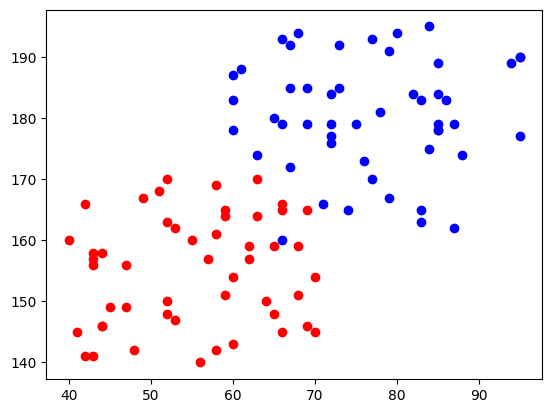

In [7]:
# print('여자 몸무게 :',[d[0] for d in data[::2]] )
# print('여자 키 :',    [d[1] for d in data[::2]] )
# print('남자 몸무게 :',[d[0] for d in data[1::2]] )
# print('남자 키 :',    [d[1] for d in data[1::2]] )
# for d in data[::2]:
#     plt.plot(d[0], d[1], 'o', color='r')
plt.plot([d[0] for d in data[::2]],
        [d[1] for d in data[::2]], 'o', color='r')
plt.plot([d[0] for d in data[1::2]],
        [d[1] for d in data[1::2]], 'o', color='b')

# 2. 군집화 로직

In [37]:
# 초기 랜덤지점 2개
random_points = [[random.randint(40, 95), random.randint(140, 195)],
                 [random.randint(40, 95), random.randint(140, 195)]]
random_points

[[51, 156], [50, 185]]

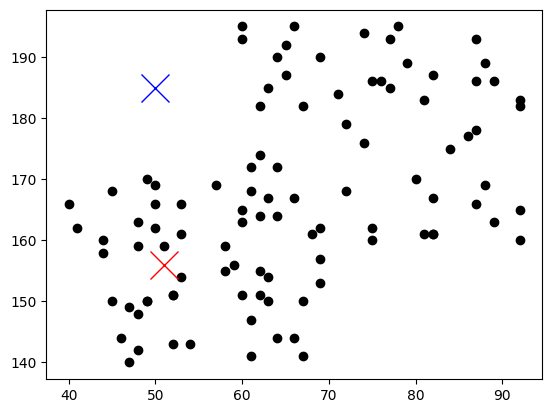

In [43]:
plt.plot([d[0] for d in data],
        [d[1] for d in data], 'o', color='k')
plt.plot(random_points[0][0], 
         random_points[0][1], 'x', color='r', markersize=20) # 기준점1
plt.plot(random_points[1][0], 
         random_points[1][1], 'x', color='b', markersize=20) # 기준점2

In [44]:
# 두 점의 거리를 return a:(0,0) ~ b:(4,3)
def dist(a, b):
    return np.sqrt( (a[0]-b[0])**2  + (a[1]-b[1])**2 )

In [46]:
a = [1, 0]; b= [4, 3]
dist(a, b)

4.242640687119285

In [47]:
# random_points[0]과 random_points[1]을 기준으로 나눈 두 영역
group1 = [] # random_points[0]이 가까운 그룹
group2 = [] # random_points[1]이 가까운 그룹
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d) # 빨간X랑 더 가까운 그룹
    else:
        group2.append(d) # 파란 X랑 더 가까운 그룹
len(group1), len(group2)

(66, 34)

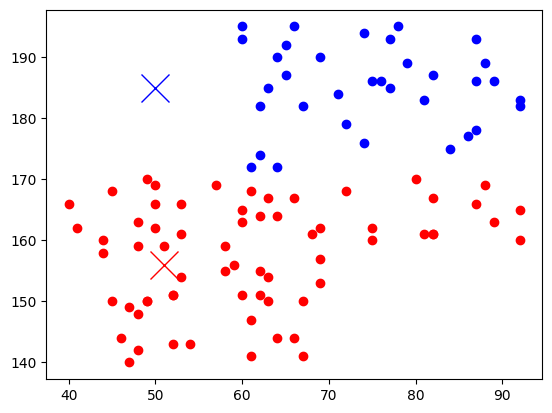

In [51]:
# 새로운 그룹 group1과 group2, 초기 램던 지점
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color='b')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=20) # 기준점1
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=20) # 기준점2
plt.show()

In [52]:
# 기준점 이동 group1의 중심점, group2중심점
sumX=0 ; sumY=0
for g in group1:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점으로 할당
random_points[0] = [sumX/len(group1), sumY/len(group1)]
sumX=0 ; sumY=0
for g in group2:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점으로 할당
random_points[1] = [sumX/len(group2), sumY/len(group2)]
random_points

[[60.96969696969697, 157.5], [74.58823529411765, 185.14705882352942]]

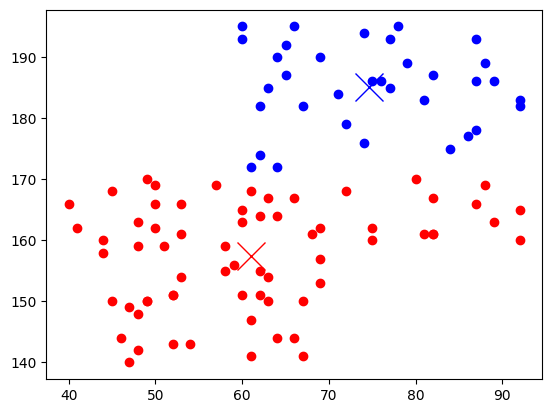

In [53]:
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color='b')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=20) # 기준점1
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=20) # 기준점2
plt.show()

# 3. 전체 코드(for문이용)
- data 생성
- 랜덤포인트2지점
- for문
    - 랜덤포인트 2지점기준으로 group1과 group2
    - 랜던포인트 이용(group1중간점, group2중간점)

초기 points :  [[73, 148], [89, 143]]
1 번째 points :  [[64.19791666666667, 166.01041666666666], [92.0, 169.5]]
2 번째 points :  [[60.58536585365854, 163.4390243902439], [86.83333333333333, 178.5]]
3 번째 points :  [[59.236111111111114, 160.13888888888889], [80.92857142857143, 181.60714285714286]]
4 번째 points :  [[58.21875, 157.8125], [77.91666666666667, 180.97222222222223]]
5 번째 points :  [[57.220338983050844, 156.84745762711864], [76.95121951219512, 179.53658536585365]]
6 번째 points :  [[56.2037037037037, 155.83333333333334], [76.0, 178.2608695652174]]
7 번째 points :  [[55.92307692307692, 155.26923076923077], [75.47916666666667, 177.9375]]
8 번째 points :  [[55.92307692307692, 155.26923076923077], [75.47916666666667, 177.9375]]
9 번째 points :  [[55.92307692307692, 155.26923076923077], [75.47916666666667, 177.9375]]
10 번째 points :  [[55.92307692307692, 155.26923076923077], [75.47916666666667, 177.9375]]


(140.0, 195.0)

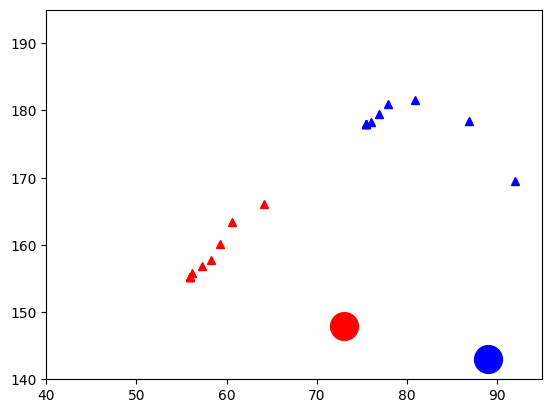

In [60]:
# 데이터 생성
data = []
for i in range(50):
    # 여자 데이터
    data.append([random.randint(40,70), random.randint(140,170)])
    # 남자 데이터
    data.append([random.randint(60,95), random.randint(160,195)])
# point 지정
points = [[random.randint(40,95), random.randint(140,195)],
          [random.randint(40,95), random.randint(140,195)]]
print("초기 points : ", points)
plt.plot(points[0][0], points[0][1], 'o', c='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'o', c='b', markersize=20)

# 포인트 2지점기준으로 group1과 group2
for i in range(1, 11):
    group1 = [] # points[0]과 가까운 그룹
    group2 = [] # points[1]과 가까운 그룹
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group1.append(d)
        else:
            group2.append(d)
    # 새로운 포인트로 할당
    sumX = 0; sumY=0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    points[0] = [sumX/len(group1), sumY/len(group1)]
    sumX = 0; sumY=0
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    points[1] = [sumX/len(group2), sumY/len(group2)]
    print(i, "번째 points : ", points)
    plt.plot(points[0][0], points[0][1], '^', c='r')
    plt.plot(points[1][0], points[1][1], '^', c='b')
plt.xlim([40,95])
plt.ylim([140,195])

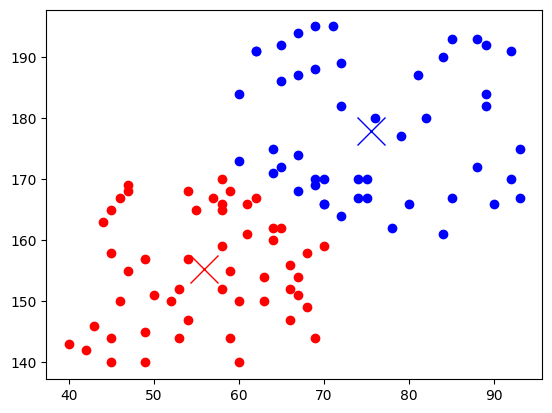

In [64]:
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
         [d[1] for d in group2], 'o', color='b')
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)

# 4. api(sklearn)를 이용한 군집화
- sklearn 머신러닝
    * 예측모델
        ; 분류, 회귀, 군집분석
        fit(학습), predict(예측)
    * 변환모델
        ; 전처리 ex. 스케일조정
        fit(학습), transform(변환함수)

In [8]:
# 군집분석 라이브러리가 joblib충돌 경고 메세지 출력
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [9]:
data = np.array(data)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, # 2개 그룹으로 나눠
              init='random', # 초기 중심점 랜덤하게
              n_init=10, # 10번 실행
              random_state=7)
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [11]:
# 중심점
model.cluster_centers_

array([[ 76.71428571, 180.7755102 ],
       [ 55.50980392, 155.17647059]])

In [12]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [13]:
group1 = data[model.labels_==1]
group2 = data[model.labels_==0]
c1, c2 = model.cluster_centers_

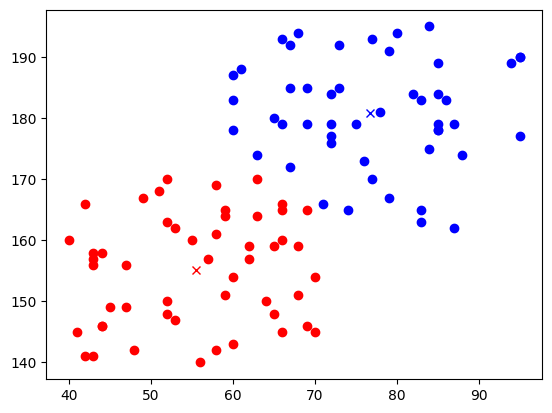

In [14]:
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
         [d[1] for d in group2], 'o', color='b')
plt.plot(c1[0], c1[1], 'x', color='b') # group2의 중심점
plt.plot(c2[0], c2[1], 'x', color='r') # group1의 중심점